In [1]:
strpath = "C:\\Users\\abhijit.a.pande\\Machine Learning\\datasets\\insurance.csv"

In [19]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
di = np.array([5260,5470,5640,6180,6390,6515,
              6805,7515,7515,8230,8770])

In [44]:
di.mean()

6753.636363636364

In [45]:
pl_var = stat.binom.pmf([1,2,3,4], 4, 0.25)

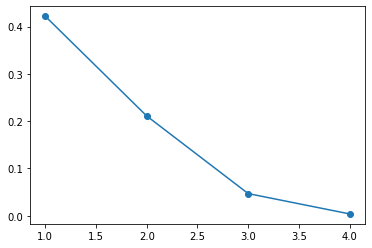

In [46]:
plt.plot([1,2,3,4], pl_var, "o-")

In [47]:
di.mean()

6753.636363636364

In [54]:
ts,pv = stat.ttest_1samp(di, 7725)

In [55]:
ts, pv

(-2.8207540608310198, 0.018137235176105812)

In [57]:
energ = np.array([
    [9.21,0],
    [7.53,1],
    [7.4,1],
    [8.08,1],
    [8.09,1],
    [10.15,1],
    [8.4,1],
    [10.83,1],
    [6.13,1],
    [7.90,1],
    [11.51,0],
    [12.79,0],
    [7.05,1],
    [11.85,0],
    [9.97,0],
    [7.48,1],
    [8.79,0],
    [9.69,0],
    [9.68,0],
    [7.58,1],
    [9.19,0],
    [8.11,1],
])

In [58]:
group1 = energ[:, 1] == 0

In [59]:
group1

array([ True, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True, False])

In [60]:
group1 = energ[group1][:,0]

In [61]:
group2 = energ[:,1] == 1

In [62]:
group2 = energ[group2][:,0] 

In [64]:
group1

array([ 9.21, 11.51, 12.79, 11.85,  9.97,  8.79,  9.69,  9.68,  9.19])

In [66]:
ts, pv = stat.ttest_ind(group1, group2)

In [69]:
ts, pv

(3.9737697158920446, 0.0007480181750036117)

In [70]:
intake = np.array([
    [5260,3910],
    [5470,4220],
    [5640,3885],
    [6180,5160],
    [6390,5645],
    [6515,4680],
    [6805,5265],
    [7515,5975],
    [7515,6790],
    [8230,6900],
    [8770,7335]
])

In [71]:
diff = intake[:,0] - intake[:,1]

In [72]:
diff

array([1350, 1250, 1755, 1020,  745, 1835, 1540, 1540,  725, 1330, 1435])

In [73]:
ts, pv = ttest_1samp (diff,0)

In [74]:
ts,pv

(11.941392877647603, 3.059020942934875e-07)

In [75]:
df = pd.read_csv(strpath)

In [76]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [104]:
female = df[df["sex"] == "female"]
female_smoker = female[female['smoker'] == "yes"]

In [109]:
male = df[df["sex"] == "male"]
male_smoker = male[male['smoker'] == "yes"]

In [119]:
male_smoker['sex'].count()

159

In [111]:
from statsmodels.stats.proportion import proportions_ztest

In [120]:
st, pv = proportions_ztest([female_smoker['sex'].count(), male_smoker['sex'].count()], [female['sex'].count(), male['sex'].count()])

In [122]:
st, pv

(-2.7867402154855503, 0.005324114164320532)

In [124]:
if pv < 0.05:
    print("reject")
else:
    print("cannot reject")

reject


In [125]:
nineteen = df[df['age'] == 19]

In [126]:
nineteen["sex"].value_counts()

male      35
female    33
Name: sex, dtype: int64

In [130]:
boy_bmi = nineteen[nineteen['sex'] == 'male']['bmi']
girl_bmi = nineteen[nineteen['sex'] == 'female']['bmi']

In [135]:
v1 = np.var(girl_bmi)
v2 = np.var(boy_bmi)

In [136]:
n = 33 
dof = n - 1
alpha = 0.05
chi_critical = 46.19
chi = dof * v2/v1

In [137]:
chi

37.8036980672267

In [139]:
cc = [643,655,702]
mc = [469,427,525]
fc = [484,456,402]

In [140]:
import seaborn as sb

In [142]:
cc = np.array(cc)

In [143]:
mc = np.array(mc)

In [144]:
fc = np.array(fc)

In [155]:
df3 = pd.DataFrame({"Car_type": "M", "MP": mc})
df2 = pd.DataFrame({"Car_type": "C", "MP": cc})
df1 = pd.DataFrame({"Car_type": "F", "MP": fc})

In [158]:
dfnew = df1.append(df2).append(df3)

In [159]:
dfnew

,Car_type,MP
0,F,484
1,F,456
2,F,402
0,C,643
1,C,655
2,C,702
0,M,469
1,M,427
2,M,525


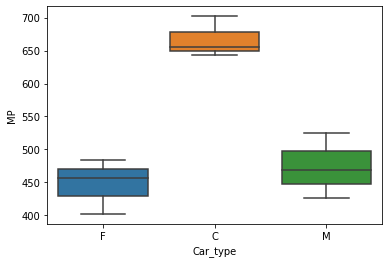

In [161]:
sb.boxplot(x = dfnew["Car_type"], y = dfnew["MP"], data = dfnew)

In [164]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols("MP ~ Car_type", data = dfnew).fit()
aov_table = sm.stats.anova_lm(mod,typ = 2)
print(aov_table)

                sum_sq   df          F    PR(>F)
Car_type  86049.555556  2.0  25.175411  0.001207
Residual  10254.000000  6.0        NaN       NaN


In [169]:
table1 = [['Day','Store-A', 'Store-B', 'Store-C', 'Store-D','Store-E'], 
         [1,79,81,74,77,66],[2,78,86,89,97,86],[3,81,97,84,94,82],[4,80,83,81,88,83],[5,70,74,77,89,68]]

In [170]:
headers = table1.pop(0)

In [171]:
dftwo = pd.DataFrame(table1, columns = headers)

In [172]:
dftwo

,Day,Store-A,Store-B,Store-C,Store-D,Store-E
0,1,79,81,74,77,66
1,2,78,86,89,97,86
2,3,81,97,84,94,82
3,4,80,83,81,88,83
4,5,70,74,77,89,68
